In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
location_encoder=LabelEncoder()
Sector_encoder=LabelEncoder()
job_encoder=LabelEncoder()
#Eligibility_encoder=CountVectorizer()
data=pd.read_csv("DataSet.csv")

In [16]:
cv=CountVectorizer()
#cv.fit_transform(data["Eli"])
#salary, job_label,Sector_label,City_label, Education
def Convert(df):
    encod=df[["Location","Job_Description","salary","Month"]]
    encod["Location"]=location_encoder.fit_transform(df["Location"])
    encod["Job_Description"]=job_encoder.fit_transform(df["Job_Description"])
   # encod["Sector"]=Sector_encoder.fit_transform(df["Sector"])
    trans=cv.fit_transform(df["Eligibility"])
    trans=pd.DataFrame(trans.todense(),columns=cv.get_feature_names())# Create a dataframe with only Eligibility values
    df2=pd.concat([encod,trans],axis=1)
    return df2
X=Convert(data)

In [25]:
data.head()

,Unnamed: 0,Location,Job_Description,Sector,Eligibility,salary,Month,vacancies
0,0,DELHI,SALES & MARKETING AGENT,Sales/Retail/Business Development,BTech BE ME MTech,35000.0,7,8.0
1,1,BENGALURU,GERMAN TRAINING COORDINATOR,Customer Service/Support,BSc Diploma,50000.0,9,8.0
2,2,BENGALURU,PROCESS ENGINEER,Engineering,MPhil PhD,150000.0,7,3.0
3,3,BENGALURU,SENIOR SOFTWARE ENGINEER,IT/Software Development,BTech BE ME MTech,60000.0,5,2.0
4,4,BENGALURU,GRAPHIC DESIGNER,Creative/Design,BDS MBBS BAMS,30000.0,7,2.0


In [26]:
sector_int=Sector_encoder.transform(data["Sector"])

In [17]:
X.head()

,Location,Job_Description,salary,Month,10th,12th,4th,5th,8th,anm,...,pathology,pg,pgdba,pgdca,pgdm,pharm,phd,professional,science,surgery
0,41,5277,35000.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,2446,50000.0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,4596,150000.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,22,6209,60000.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,2482,30000.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:

def fun(salary, job_label,City_label, Education, Month=0):
    
    #Month=0
     #encod=df[["Location","Job_Description","Sector","Eligibility","salary","Month"]
    education_encoded=cv.transform([Education])
    
    job_int=job_encoder.transform([job_label])#return an array
    
   # print(job_int)
    
    city_int=location_encoder.transform([City_label])
    
    #sector_int=Sector_encoder.transform([Sector_label])
    
    df1=pd.DataFrame([[city_int[0],job_int[0],int(salary),Month]],columns=["Location","Job_Description","salary","Month"])#give the data frame which have all the labeles variable
        
    
    df2=pd.DataFrame(education_encoded.todense(),columns=cv.get_feature_names())# gives dataframe by encoding EDUCATION
    
    df1=pd.concat([df1,df2],axis=1)#Combined data frame which is to be predicted
    
    return df1


In [21]:
to_predict=fun("3000","SALES & MARKETING AGENT","DELHI","BTech")

In [22]:
to_predict

,Location,Job_Description,salary,Month,10th,12th,4th,5th,8th,anm,...,pathology,pg,pgdba,pgdca,pgdm,pharm,phd,professional,science,surgery
0,41,5277,3000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y=sector_int

In [65]:
from xgboost import XGBClassifier
model1=XGBClassifier()
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)


0.7095027080256031

In [66]:
a=model1.predict(X_test)
a

array([20, 27,  7, ..., 20, 10, 20])

In [70]:
diff=0;same=0
b=[]
for i in a:
    
    #print(i)
    b.append(Sector_encoder.inverse_transform([int(i)])[0])


['Marketing',
 'Sales/Retail/Business Development',
 'Customer Service/Support',
 'IT/Software Development',
 'Engineering',
 'IT/Software Development',
 'Sales/Retail/Business Development',
 'Sales/Retail/Business Development',
 'IT/Software Development',
 'IT/Software Development',
 'Sales/Retail/Business Development',
 'IT/Software Development',
 'Engineering',
 'IT/Software Development',
 'Quality Assurance/Quality Control',
 'Marketing',
 'Sales/Retail/Business Development',
 'IT/Software Development',
 'IT/Software Development',
 'Marketing',
 'IT/Software Development',
 'Customer Service/Support',
 'Creative/Design',
 'IT/Software Development',
 'IT/Software Development',
 'IT/Software Development',
 'IT/Software Development',
 'Marketing',
 'Creative/Design',
 'Sales/Retail/Business Development',
 'Customer Service/Support',
 'Sales/Retail/Business Development',
 'Project/Program Management',
 'IT/Software Development',
 'IT/Software Development',
 'IT/Software Development',
 '

In [42]:
train_sizes, train_scores, test_scores = learning_curve(model1,
                                               X, y, cv=10, scoring= 'accuracy', n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


2985

In [77]:
from collections import Counter
c=Counter(b).most_common(20)

In [82]:
sector=[]
count=[]
print(c[0][0])
for i in range(len(c)):
    sector.append(c[i][0])
    count.append(c[i][1])

IT/Software Development


In [83]:
sector

['IT/Software Development',
 'Engineering',
 'Customer Service/Support',
 'Marketing',
 'Sales/Retail/Business Development',
 'Creative/Design',
 'Editorial/Writing',
 'Quality Assurance/Quality Control',
 'Administration',
 'Project/Program Management',
 'Education/Training',
 'Medical',
 'Installation/Maintenance/Repair',
 'Manufacturing/Production/Operations',
 'Pharmaceutical',
 'Tourism/Travel',
 'Biotech/R&D/Science',
 'Logistics/Transportation',
 'Banking',
 'Research']

In [86]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


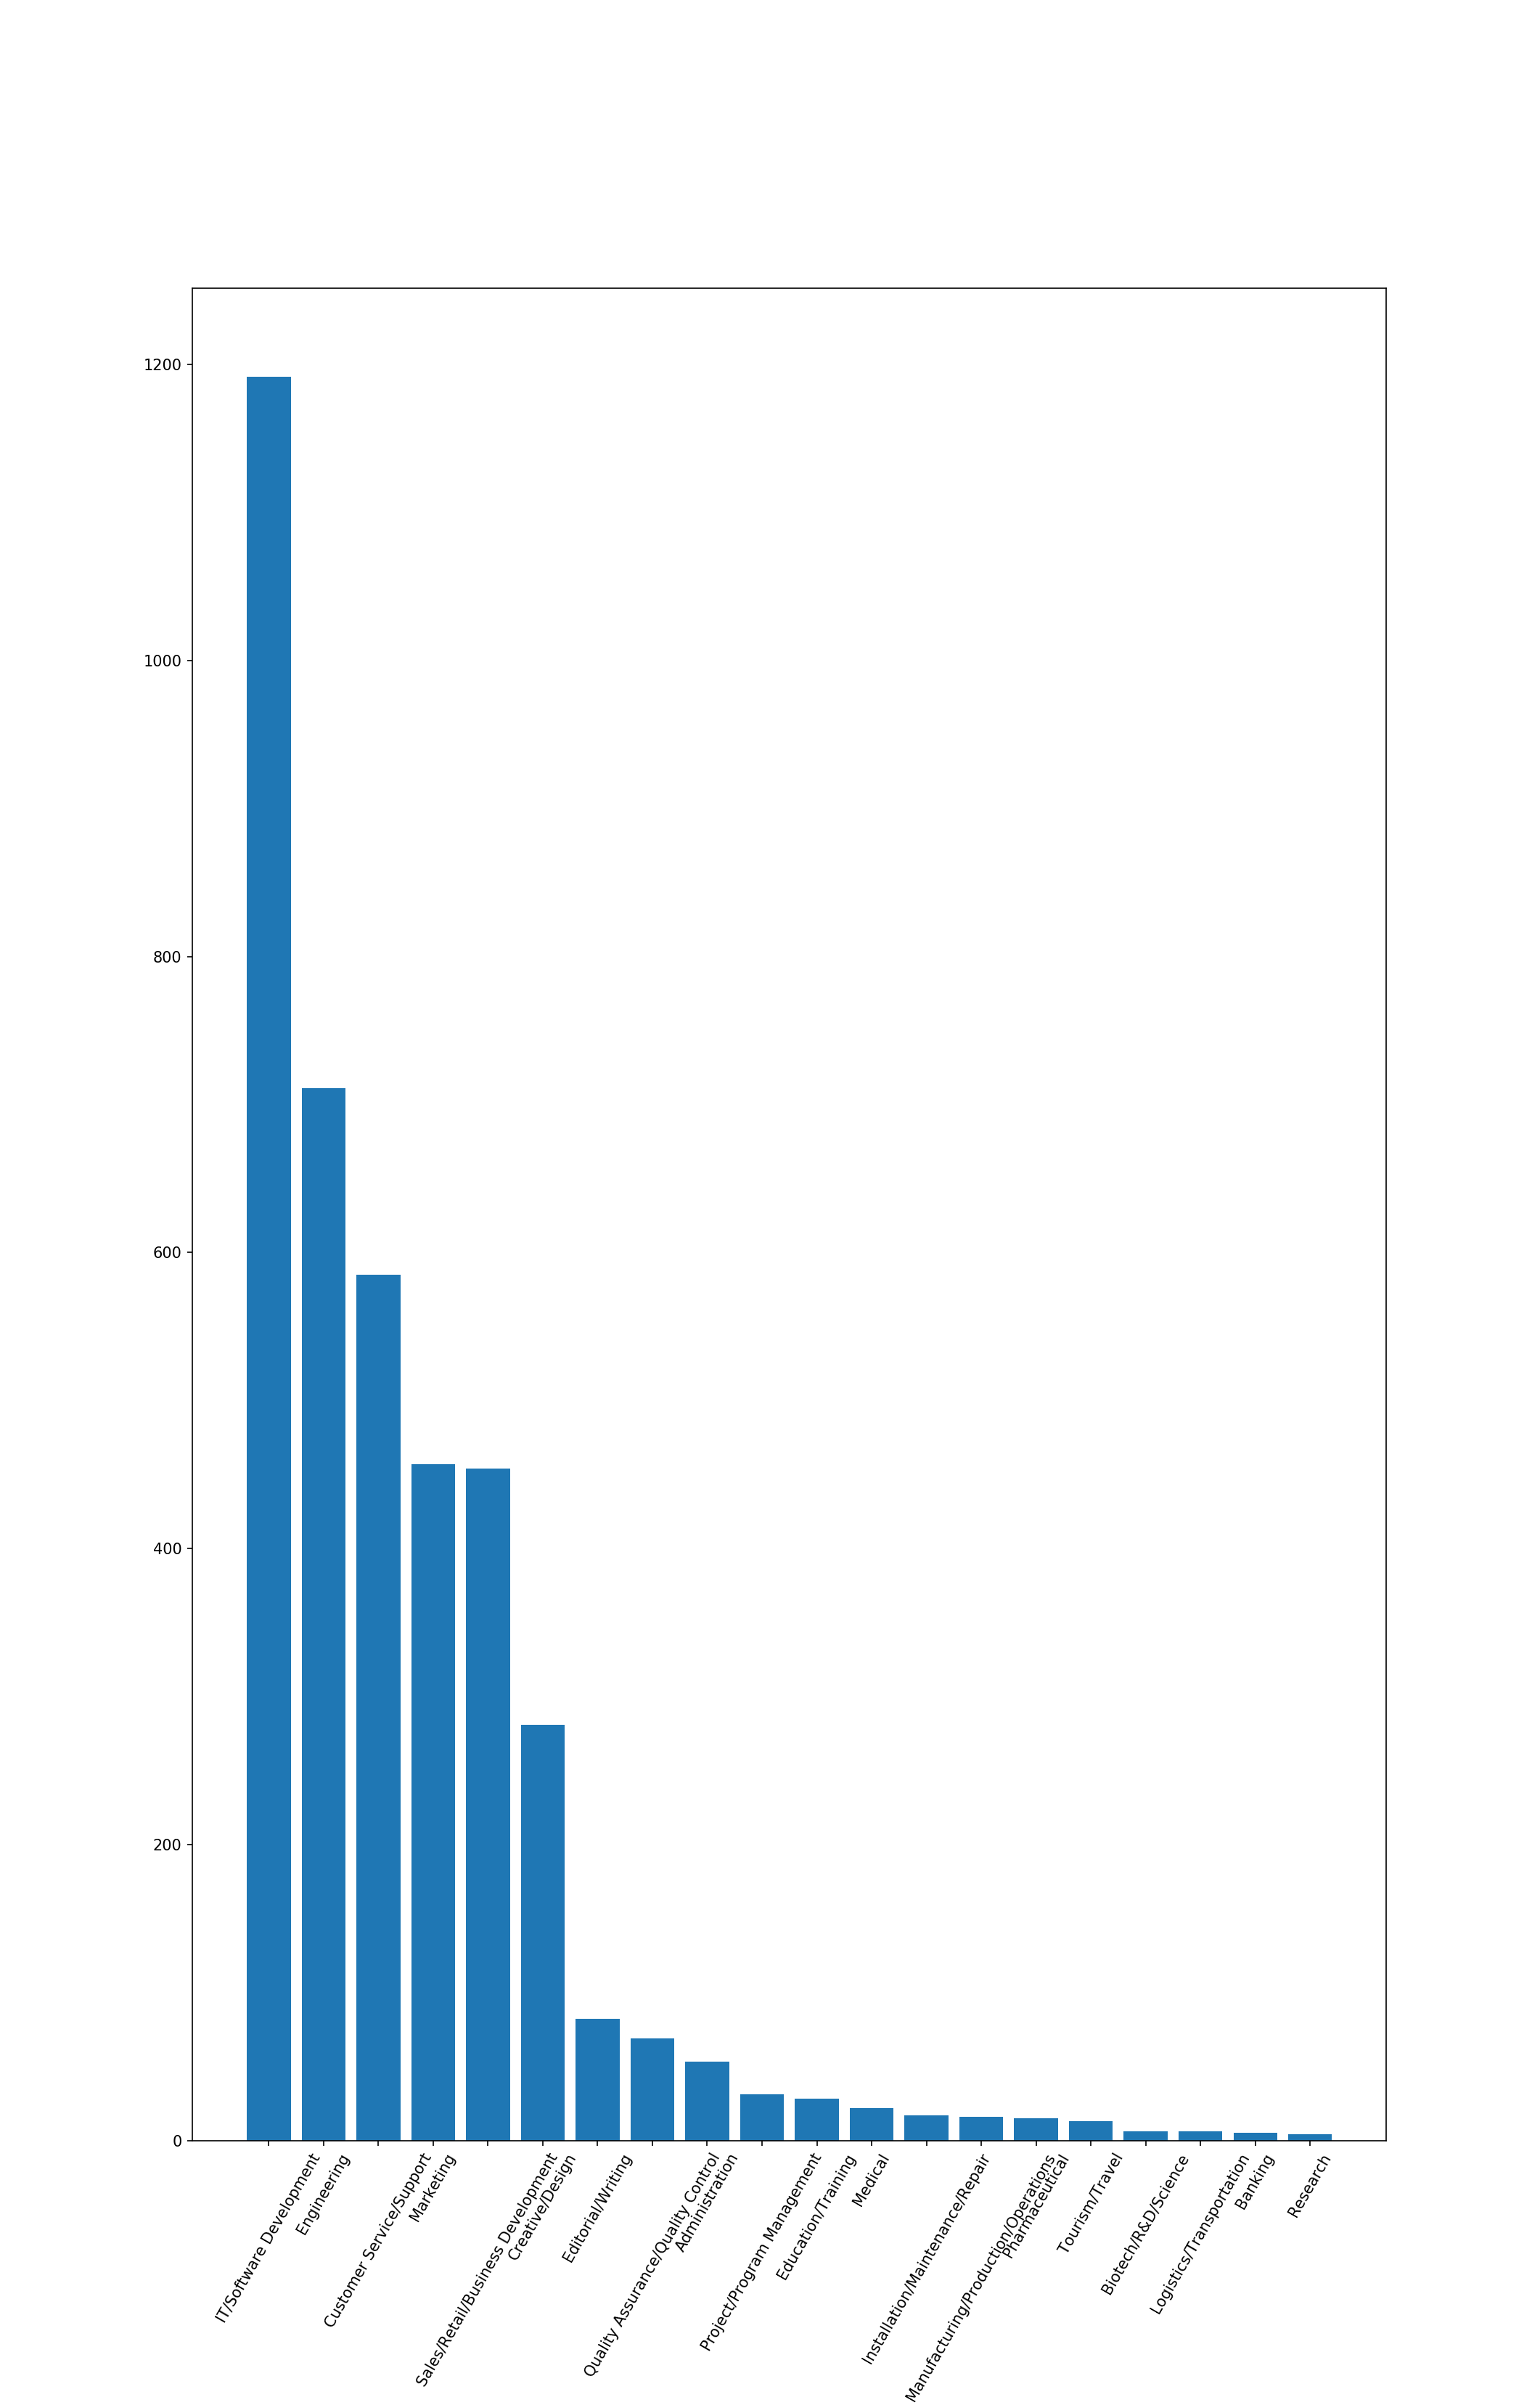

([<matplotlib.axis.XTick at 0x7fed9144ae10>,
 <a list of 20 Text xticklabel objects>)

In [91]:
plt.figure(figsize = (10,20))
plt.bar(sector,count)
plt.xticks(sector, rotation = "60")